In [1]:
# Parameters
run_id = "20251023-053615"
auto_download = "true"


# 👋 PyCaret Regression Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient.

**Course:** CMPE-255 Data Mining  
**Institution:** San José State University  
**Last Updated:** October 2025

---

## Requirements
- Python 3.11 (recommended) or 3.10
- PyCaret 3.3.2
- See README.md for complete setup instructions

## Environment Verification

Let's verify we have the correct Python version and PyCaret installed.

In [2]:
# Check Python version
import sys
print(f"Python version: {sys.version}")
print(f"Version: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")

if sys.version_info.major == 3 and 9 <= sys.version_info.minor <= 11:
    print(f"\n✅ Python {sys.version_info.major}.{sys.version_info.minor} is compatible with PyCaret!")
elif sys.version_info >= (3, 12):
    print(f"\n❌ Python 3.12+ is not supported by PyCaret 3.3.2")
    print("Please use Python 3.11 or 3.10 (see README.md for instructions)")
else:
    print(f"\n⚠️  Python {sys.version_info.major}.{sys.version_info.minor} may have compatibility issues")

Python version: 3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:29:10) [GCC 14.3.0]
Version: 3.10.19

✅ Python 3.10 is compatible with PyCaret!


In [3]:
# Verify PyCaret installation
try:
    import pycaret
    print(f"PyCaret version: {pycaret.__version__}")
    
    import numpy as np
    import pandas as pd
    import sklearn
    
    print(f"NumPy version: {np.__version__}")
    print(f"Pandas version: {pd.__version__}")
    print(f"Scikit-learn version: {sklearn.__version__}")
    
    print("\n✅ All packages installed successfully!")
    print("Ready to start the tutorial.")
    
except ImportError as e:
    print(f"\n❌ Import error: {e}")
    print("\nPlease install PyCaret:")
    print("  pip install pycaret[full]==3.3.2")
    print("\nSee README.md for complete setup instructions.")

PyCaret version: 3.3.2
NumPy version: 1.26.4
Pandas version: 2.1.4
Scikit-learn version: 1.4.2

✅ All packages installed successfully!
Ready to start the tutorial.


---

# 🚀 Quick Start Tutorial

PyCaret's Regression Module is a supervised machine learning module used for estimating relationships between a dependent variable (target) and one or more independent variables (features).

**Objective:** Predict continuous values such as:
- Sales amounts
- Quantities
- Temperatures
- Insurance charges (our example)

## Typical PyCaret Workflow

**Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

## Step 1: Load Data

We'll use the insurance dataset from PyCaret's built-in datasets.

In [4]:
import os
from pathlib import Path
import pandas as pd

# Setup data directory
data_dir = Path('../datasets/regression')
data_dir.mkdir(parents=True, exist_ok=True)

data_path = data_dir / 'housing.csv'

# Download from Kaggle if not already present
if not data_path.exists():
    print(f"📥 Downloading dataset from Kaggle...")

    # Check for Kaggle credentials
    kaggle_json = Path.home() / '.kaggle' / 'kaggle.json'

    if not kaggle_json.exists():
        print("⚠️  Kaggle credentials not found!")
        print("\nTo download datasets automatically, you need Kaggle API credentials:")
        print("1. Go to https://www.kaggle.com/settings")
        print("2. Scroll to 'API' section and click 'Create New API Token'")
        print("3. This downloads kaggle.json")
        print("4. Upload kaggle.json to your home directory:")
        print("   - In Vertex AI: Upload to /home/jupyter/.kaggle/")
        print("   - Or set KAGGLE_USERNAME and KAGGLE_KEY environment variables")
        print("\nFor now, using a backup URL...")

        # Fallback: Try to download from a direct URL if available
        try:
            import urllib.request
            # Note: This URL is a placeholder - update with actual backup URL if available
            backup_url = "https://storage.googleapis.com/pycaret-examples-backup/regression/housing.csv"
            print(f"Trying backup URL: {backup_url}")
            urllib.request.urlretrieve(backup_url, data_path)
            print("✅ Downloaded from backup URL")
        except Exception as e:
            print(f"❌ Backup download failed: {e}")
            raise Exception("Please upload kaggle.json or manually download the dataset")
    else:
        # Download using Kaggle API
        import kaggle
        print(f"Downloading from Kaggle: camnugent/california-housing-prices")
        kaggle.api.dataset_download_files(
            'camnugent/california-housing-prices',
            path=data_dir,
            unzip=True,
            quiet=False
        )
        print(f"✅ Dataset downloaded to {data_dir}")
else:
    print(f"✅ Dataset already exists at {data_path}")

# Load the data
print(f"\n📊 Loading dataset...")
data = pd.read_csv(data_path)
print(f"Dataset shape: {data.shape}")


✅ Dataset already exists at ../datasets/regression/housing.csv

📊 Loading dataset...
Dataset shape: (20640, 10)


In [5]:
# Quick data exploration
print("Dataset Info:")
data.info()

print("\n" + "="*50)
print("Statistical Summary:")
data.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Statistical Summary:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Step 2: Setup

The `setup()` function initializes the training environment and creates the transformation pipeline.

**This is the most important step in PyCaret!**

### Required Parameters:
- `data`: Your pandas DataFrame
- `target`: Name of the target column

### Common Optional Parameters:
- `session_id`: Random seed for reproducibility
- `train_size`: Proportion of data for training (default: 0.7)
- `normalize`: Enable feature normalization
- `transformation`: Enable feature transformation
- `pca`: Enable PCA for dimensionality reduction
- `verbose`: Control output verbosity

In [6]:
from pycaret.regression import *

# Initialize the setup
s = setup(data, target='median_house_value', fold=3, session_id=123)  # fold=3 for faster execution

,Description,Value
0,Session id,123
1,Target,median_house_value
2,Target type,Regression
3,Original data shape,"(20640, 10)"
4,Transformed data shape,"(20640, 14)"
5,Transformed train set shape,"(14447, 14)"
6,Transformed test set shape,"(6193, 14)"
7,Numeric features,8
8,Categorical features,1
9,Rows with missing values,1.0%


### Alternative: Object-Oriented API

PyCaret supports both Functional and OOP approaches. Both produce identical results.

In [7]:
# Object-Oriented API (optional - you can skip this cell)
from pycaret.regression import RegressionExperiment

exp = RegressionExperiment()
# exp.setup(data, target='median_house_value', session_id=123)

## Step 3: Compare Models

The `compare_models()` function trains and evaluates ALL available estimators using cross-validation.

**This is PyCaret's AutoML feature!**

It will automatically:
- Train 25+ regression models
- Perform cross-validation
- Evaluate on multiple metrics
- Return the best model

In [8]:
# Compare top models only (fast mode)
# Testing fewer models for faster execution
best = compare_models(include=['lr', 'ridge', 'rf', 'lightgbm', 'gbr'], n_select=1)

print(f"\nBest model: {type(best).__name__}")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,32821.3369,2407425173.5361,49064.6499,0.8196,0.2406,0.1830,25.5300
rf,Random Forest Regressor,33663.7204,2651348673.5270,51489.8458,0.8013,0.2477,0.1873,1.7700
gbr,Gradient Boosting Regressor,39144.1209,3168067921.2413,56285.5790,0.7626,0.2741,0.2192,0.6733
lr,Linear Regression,50233.6168,4771242231.8156,69073.0166,0.6424,0.3888,0.2890,0.7900
ridge,Ridge Regression,50232.9618,4770918289.9898,69070.6255,0.6424,0.3887,0.2890,0.6900



Best model: LGBMRegressor


In [9]:
# Access the comparison results as a DataFrame
results = pull()
results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,32821.3369,2.407425e+09,49064.6499,0.8196,0.2406,0.1830,25.5300
rf,Random Forest Regressor,33663.7204,2.651349e+09,51489.8458,0.8013,0.2477,0.1873,1.7700
gbr,Gradient Boosting Regressor,39144.1209,3.168068e+09,56285.5790,0.7626,0.2741,0.2192,0.6733
lr,Linear Regression,50233.6168,4.771242e+09,69073.0166,0.6424,0.3888,0.2890,0.7900
ridge,Ridge Regression,50232.9618,4.770918e+09,69070.6255,0.6424,0.3887,0.2890,0.6900


### Alternative: Train a Specific Model

If you want to train a specific model instead of comparing all:

In [10]:
# View all available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [11]:
# SKIPPED: XGBoost has issues with column names containing special characters
# # Create a specific model (XGBoost Regressor)
# xgboost = create_model('xgboost')
#
# Note: If you want to use XGBoost, clean column names first:
# data.columns = data.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

## Step 4: Analyze Model

Use `plot_model()` to visualize model performance on the test set.

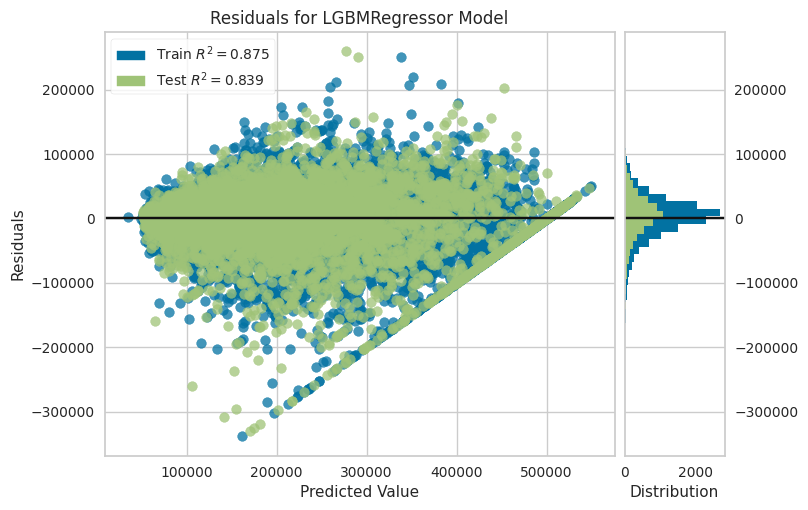

In [12]:
# Plot residuals
plot_model(best, plot='residuals')

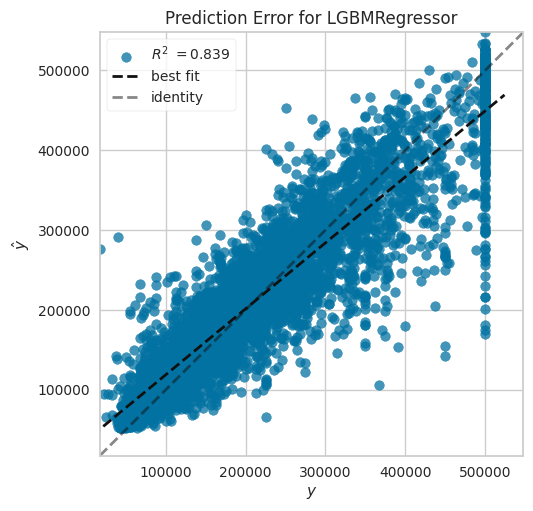

In [13]:
# Plot prediction error
plot_model(best, plot='error')

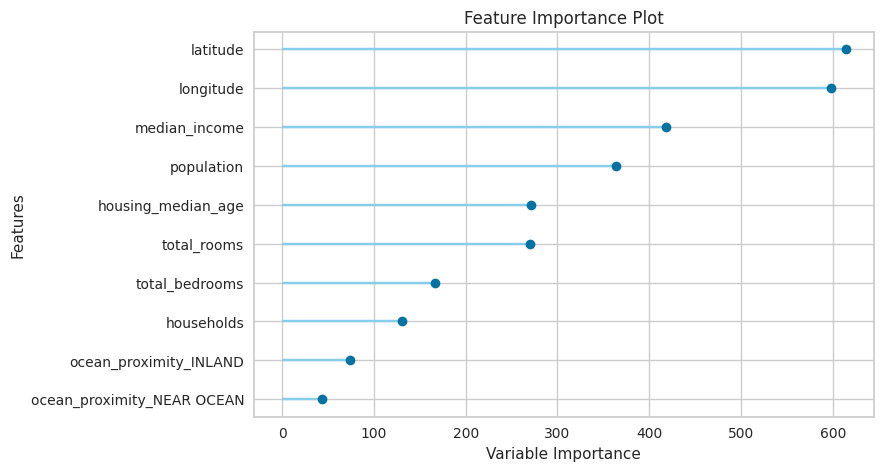

In [14]:
# Plot feature importance
plot_model(best, plot='feature')

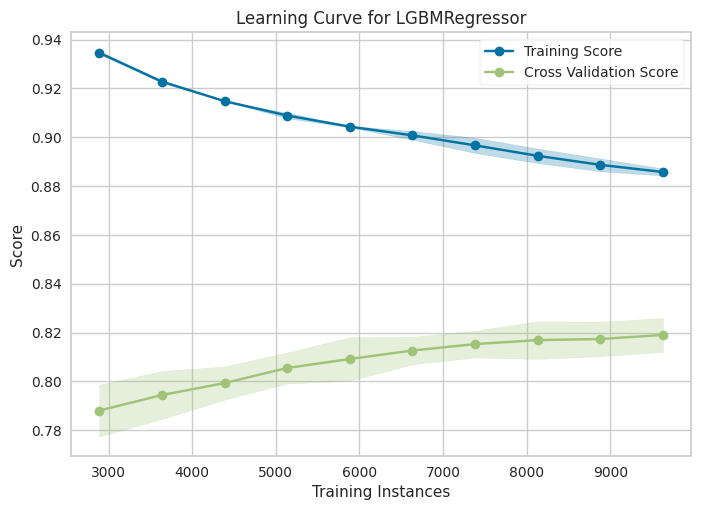

In [15]:
# Plot learning curve
plot_model(best, plot='learning')

In [16]:
# Interactive evaluation (only works in Jupyter notebooks)
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Step 5: Make Predictions

The `predict_model()` function generates predictions and adds them as a new column.

In [17]:
# Predict on the holdout (test) set
holdout_pred = predict_model(best)

print(f"Predictions shape: {holdout_pred.shape}")
holdout_pred.head(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,31369.6739,2131895630.1813,46172.4553,0.8388,0.2318,0.1781


Predictions shape: (6193, 11)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,prediction_label
19121,-122.639999,38.240002,40.0,1974.0,410.0,1039.0,398.0,3.7917,<1H OCEAN,151600.0,198882.814187
20019,-119.050003,36.090000,9.0,3297.0,568.0,1749.0,568.0,4.0217,INLAND,99200.0,101132.884212
15104,-116.980003,32.849998,12.0,3570.0,713.0,3321.0,666.0,4.0882,<1H OCEAN,134500.0,158276.279342
3720,-118.419998,34.200001,27.0,3201.0,970.0,3403.0,948.0,2.2377,<1H OCEAN,231700.0,187507.999339
8938,-118.470001,34.009998,41.0,2704.0,557.0,1047.0,478.0,4.4211,<1H OCEAN,462900.0,453448.462461
13730,-117.180000,34.040001,41.0,1766.0,288.0,753.0,278.0,4.9125,INLAND,140700.0,185615.498054
7955,-118.160004,33.880001,18.0,2287.0,662.0,1804.0,537.0,1.9903,<1H OCEAN,170300.0,146602.831017
15109,-116.959999,32.860001,14.0,3064.0,496.0,1681.0,503.0,4.4347,<1H OCEAN,160300.0,166447.121396
14354,-117.230003,32.750000,23.0,2415.0,653.0,1275.0,596.0,3.1389,NEAR OCEAN,101800.0,234407.946956
4450,-118.209999,34.070000,42.0,902.0,318.0,1312.0,323.0,1.9375,<1H OCEAN,168800.0,148379.944308


In [18]:
# Check prediction performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true = holdout_pred['median_house_value']
y_pred = holdout_pred['prediction_label']

print("Holdout Set Performance:")
print(f"MAE: ${mean_absolute_error(y_true, y_pred):,.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_true, y_pred)):,.2f}")
print(f"R² Score: {r2_score(y_true, y_pred):.4f}")

Holdout Set Performance:
MAE: $31,369.67
RMSE: $46,172.46
R² Score: 0.8388


In [19]:
# Predict on new unseen data (without target column)
new_data = data.copy().drop('median_house_value', axis=1)

predictions = predict_model(best, data=new_data)

print(f"Predictions for unseen data:")
# Show first few columns and prediction
predictions[predictions.columns[:5].tolist() + ['prediction_label']].head(10)

Predictions for unseen data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,prediction_label
0,-122.230003,37.880001,41.0,880.0,129.0,412646.992698
1,-122.220001,37.860001,21.0,7099.0,1106.0,421506.847007
2,-122.239998,37.849998,52.0,1467.0,190.0,415404.138010
3,-122.250000,37.849998,52.0,1274.0,235.0,344059.284174
4,-122.250000,37.849998,52.0,1627.0,280.0,275169.000685
5,-122.250000,37.849998,52.0,919.0,213.0,260514.327118
6,-122.250000,37.840000,52.0,2535.0,489.0,267690.957157
7,-122.250000,37.840000,52.0,3104.0,687.0,255933.057195
8,-122.260002,37.840000,42.0,2555.0,665.0,179261.713310
9,-122.250000,37.840000,52.0,3549.0,707.0,282801.347753


## Step 6: Save Model

Save the entire pipeline (preprocessing + model) for later use.

In [20]:
# Save the model pipeline
save_model(best, 'insurance_model')

print("✅ Model saved as 'insurance_model.pkl'")

Transformation Pipeline and Model Successfully Saved
✅ Model saved as 'insurance_model.pkl'


In [21]:
# Load the model back
loaded_model = load_model('insurance_model')

print(f"✅ Model loaded: {type(loaded_model).__name__}")

# Verify it works
test_pred = predict_model(loaded_model, data=new_data.head(5))
test_pred

Transformation Pipeline and Model Successfully Loaded
✅ Model loaded: Pipeline


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,prediction_label
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,412646.992698
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,421506.847007
2,-122.239998,37.849998,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,415404.138010
3,-122.250000,37.849998,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,344059.284174
4,-122.250000,37.849998,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,275169.000685


---

# 📚 Advanced Features

The sections below demonstrate advanced PyCaret capabilities.

## Advanced Model Comparison

**SKIPPED FOR FASTER EXECUTION**```python# Compare only tree-based models (excluding xgboost due to column name issues)tree_models = compare_models(    include=['dt', 'rf', 'et', 'gbr', 'lightgbm', 'ada'])tree_results = pull()tree_results```

**SKIPPED FOR FASTER EXECUTION**```python# Get top 3 models sorted by MAEtop3_mae = compare_models(sort='MAE', n_select=3)print(f"\nTop 3 models by MAE:")for i, model in enumerate(top3_mae, 1):    print(f"{i}. {type(model).__name__}")```

## Hyperparameter Tuning

The `tune_model()` function performs hyperparameter optimization.

In [22]:
# Create a baseline decision tree
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,46143.6080,5437769348.0930,73741.2323,0.6036,0.3419,0.2454
1,46136.6474,5211464498.6698,72190.4737,0.6079,0.3402,0.2525
2,47452.6129,5560173278.6773,74566.5694,0.5737,0.3499,0.2653
Mean,46577.6228,5403135708.4800,73499.4252,0.5951,0.3440,0.2544
Std,618.7180,144450845.2916,984.9909,0.0152,0.0042,0.0082


**SKIPPED FOR FASTER EXECUTION**```python# Tune hyperparameters using RandomizedSearchCV (default)tuned_dt = tune_model(dt)```

**SKIPPED FOR FASTER EXECUTION**```python# Tune with custom griddt_grid = {    'max_depth': [2, 4, 6, 8, 10, 12],    'min_samples_split': [2, 5, 10],    'min_samples_leaf': [1, 2, 4]}tuned_dt_custom = tune_model(dt, custom_grid=dt_grid, optimize='MAE')```

In [23]:
# SKIPPED: Requires optuna-integration package
# # Tune using Optuna (Bayesian optimization)
# # Note: This requires optuna to be installed
# # pip install optuna
# 
# tuned_dt_optuna = tune_model(dt, search_library='optuna', n_iter=20)

## Ensemble Methods

**SKIPPED FOR FASTER EXECUTION**```python# Bagging ensemblebagged_dt = ensemble_model(dt, method='Bagging')```

**SKIPPED FOR FASTER EXECUTION**```python# Boosting ensemble (AdaBoost)boosted_dt = ensemble_model(dt, method='Boosting')```

## Blend & Stack Models

**SKIPPED FOR FASTER EXECUTION**```python# Blend multiple models (voting regressor)blended = blend_models(top3_mae)```

**SKIPPED FOR FASTER EXECUTION**```python# Stack models (meta-learning)stacked = stack_models(top3_mae)```

**SKIPPED FOR FASTER EXECUTION**```python# Stack with custom meta-modellr = create_model('lr')stacked_custom = stack_models(top3_mae, meta_model=lr)```

## Model Interpretation with SHAP

**SKIPPED FOR FASTER EXECUTION**```python# Train a tree-based model for interpretationlgbm = create_model('lightgbm')```

**SKIPPED FOR FASTER EXECUTION**```python# SHAP summary plotinterpret_model(lgbm, plot='summary')```

**SKIPPED FOR FASTER EXECUTION**```python# SHAP reason plot for a specific predictioninterpret_model(lgbm, plot='reason', observation=0)```

**SKIPPED FOR FASTER EXECUTION**```python# SHAP correlation plotinterpret_model(lgbm, plot='correlation')```

## Leaderboard & AutoML

**SKIPPED FOR FASTER EXECUTION**```python# Get leaderboard of all trained modelslb = get_leaderboard()lb```

**SKIPPED FOR FASTER EXECUTION**```python# Find best model by specific metricbest_by_mae = lb.sort_values(by='MAE', ascending=True).iloc[0]print(f"Best model by MAE: {best_by_mae['Model']}")print(f"MAE: ${best_by_mae['MAE']:,.2f}")print(f"RMSE: ${best_by_mae['RMSE']:,.2f}")print(f"R²: {best_by_mae['R2']:.4f}")```

**SKIPPED FOR FASTER EXECUTION**```python# AutoML - automatically select and return best modelbest_model = automl(optimize='MAE')print(f"\nAutoML selected: {type(best_model).__name__}")```

## Advanced Setup Options

In [24]:
# Access experiment configuration
config = get_config()

print("Configuration type:", type(config))
print("Available config keys (first 15):")
config_list = list(config) if isinstance(config, set) else list(config.keys())
print(config_list[:15])

Configuration type: <class 'set'>
Available config keys (first 15):
['USI', 'X', 'y_train_transformed', 'fold_generator', 'pipeline', 'test_transformed', 'test', 'logging_param', 'seed', 'log_plots_param', 'html_param', 'train', 'dataset', 'y_train', 'fold_shuffle_param']


In [25]:
# Access specific configuration elements
X_train = get_config('X_train')
X_test = get_config('X_test')
y_train = get_config('y_train')
y_test = get_config('y_test')

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Target (train): {y_train.shape}")
print(f"Target (test): {y_test.shape}")

Training set: (14447, 9)
Test set: (6193, 9)
Target (train): (14447,)
Target (test): (6193,)


In [26]:
# SKIPPED: Advanced setup example (optional)
# # Setup with advanced preprocessing
# s2 = setup(
#     data, 
#     target='median_house_value',
#     session_id=456,
#     normalize=True,              # Normalize features
#     normalize_method='minmax',   # Use Min-Max normalization
#     transformation=True,          # Transform features
#     transformation_method='yeo-johnson',  # Yeo-Johnson transformation
#     feature_selection=True,      # Perform feature selection
#     remove_multicollinearity=True,  # Remove multicollinear features
#     multicollinearity_threshold=0.9,
#     train_size=0.8               # Use 80% for training
# )

In [27]:
# SKIPPED: Column names may change after transformation
# The transformed data may have different column names
# Use get_config('X_train_transformed') to see actual transformed data

# Show first few rows of transformed data instead
X_transformed = get_config('X_train_transformed')
print("Transformed data shape:", X_transformed.shape)
print("\nFirst few rows of transformed data:")
print(X_transformed.head())

Transformed data shape: (14447, 13)

First few rows of transformed data:
        longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
12271 -117.040001  34.000000                21.0       4624.0           852.0   
19605 -121.029999  37.549999                32.0        946.0           198.0   
10600 -117.800003  33.680000                 8.0       2032.0           349.0   
45    -122.260002  37.830002                52.0       1656.0           420.0   
2889  -118.989998  35.389999                52.0       2805.0           573.0   

       population  households  median_income  ocean_proximity_INLAND  \
12271      2174.0       812.0         3.5255                     1.0   
19605       624.0       173.0         1.9728                     1.0   
10600       862.0       340.0         6.9133                     0.0   
45          718.0       382.0         2.6768                     0.0   
2889       1325.0       522.0         2.5083                     1.0   

       

## Deployment Tools

In [28]:
# Finalize model (retrain on full dataset including holdout)
final_model = finalize_model(best)

print(f"✅ Final model trained on full dataset: {type(final_model).__name__}")

✅ Final model trained on full dataset: Pipeline


In [29]:
# SKIPPED: Optional deployment feature
# # Create FastAPI application
# create_api(final_model, api_name='insurance_api')
# 
# print("\n✅ API files created:")
# print("  - insurance_api.py (FastAPI application)")
# print("\nTo run the API:")
# print("  python insurance_api.py")

In [30]:
# SKIPPED: Optional deployment feature
# # Create Docker configuration
# create_docker('insurance_api')
# 
# print("\n✅ Docker files created:")
# print("  - Dockerfile")
# print("  - requirements.txt")
# print("\nTo build and run:")
# print("  docker build -t insurance-api .")
# print("  docker run -p 8000:8000 insurance-api")

In [31]:
# SKIPPED: Optional Gradio app feature
# # Create Gradio app for interactive predictions
# create_app(final_model)
# 
# # This will launch an interactive web interface

In [32]:
# SKIPPED: Optional dashboard feature
# # Create dashboard
# dashboard(best, display_format='inline')
# 
# # This creates an interactive dashboard in the notebook

In [33]:
# SKIPPED: Optional model conversion feature
# # Convert model to different programming languages
# java_code = convert_model(dt, language='java')
# 
# print("Java code (first 500 characters):")
# print(java_code[:500])
# print("\n... (truncated)")

## Experiment Persistence

**SKIPPED FOR FASTER EXECUTION**```python# Save entire experiment (all models, transformations, config)save_experiment('insurance_experiment')print("✅ Experiment saved as 'insurance_experiment.pkl'")```

**SKIPPED FOR FASTER EXECUTION**```python# Load experimentloaded_exp = load_experiment('insurance_experiment', data=data)print("✅ Experiment loaded successfully!")print("\nYou can now use all models and continue where you left off.")```

---

# 🎉 Congratulations!

You've completed the PyCaret Regression tutorial!

## What You Learned

✅ **Environment Setup** - Configuring PyCaret with preprocessing pipelines  
✅ **AutoML** - Automatically comparing 25+ regression models  
✅ **Model Analysis** - Visualizing performance with various plots  
✅ **Hyperparameter Tuning** - Optimizing models with multiple strategies  
✅ **Ensemble Methods** - Bagging, boosting, blending, and stacking  
✅ **Model Interpretation** - Understanding predictions with SHAP  
✅ **Deployment** - Creating APIs, dashboards, and Docker containers  
✅ **Persistence** - Saving and loading models and experiments

## Key Takeaways

1. **Low-Code ML**: PyCaret reduces hundreds of lines to just a few
2. **Automation**: Compare models, tune parameters, and ensemble automatically
3. **Production-Ready**: Built-in tools for deployment and monitoring
4. **Flexibility**: Both functional and OOP APIs available
5. **Comprehensive**: Covers entire ML lifecycle from data to deployment

## Next Steps

1. **Try your own data** - Apply PyCaret to your projects
2. **Explore other modules** - Classification, Clustering, Anomaly Detection, Time Series
3. **Deploy a model** - Use the API and Docker files created
4. **Join the community** - Contribute and learn from others

## Resources

- **Documentation:** https://pycaret.readthedocs.io
- **GitHub:** https://github.com/pycaret/pycaret
- **Tutorials:** https://pycaret.gitbook.io
- **API Reference:** https://pycaret.readthedocs.io/en/latest/api/regression.html
- **Community:** https://github.com/pycaret/pycaret/discussions

---

**Course:** CMPE-255 Data Mining  
**Institution:** San José State University  

Happy Machine Learning! 🚀